Loading the IMDB dataset...
Dataset loaded successfully.

First review in training data (as integers):
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Baseline model training complete.

Baseline Model - Test Loss: 0.6615, Test Accuracy: 0.85564

Experiment 1: Varying the Number of Hidden Layers...

Experiment 1 complete.

Experiment 2: Varying the Number of Hidden Units...

Experiment 2 complete.

Experiment 3: Varying the Loss Function...

Experiment 3 complete.

Experiment 4: Varying the Activation Function...

Experiment 4 complete.

Experiment 5: Implementing Dropout Technique...

Experiment 5 complete.

--- Summary of Results ---

Hidden Layers:
   Validation Accuracy  Test Accuracy
1              0.8681        0.86164
3              0.8681        0.85412

Hidden Units:
     Validation Accuracy  Test Accuracy
32 and 64           0.8681        0.85616
128                 0.8681        0.85836

Loss Function:
                     Validation Accuracy  Test Accuracy
MSE                           0.8681        0.85632
Binary Crossentropy           0.8681        0.85564

Activation Function:
      Validation Accuracy  Test Accuracy
Ta

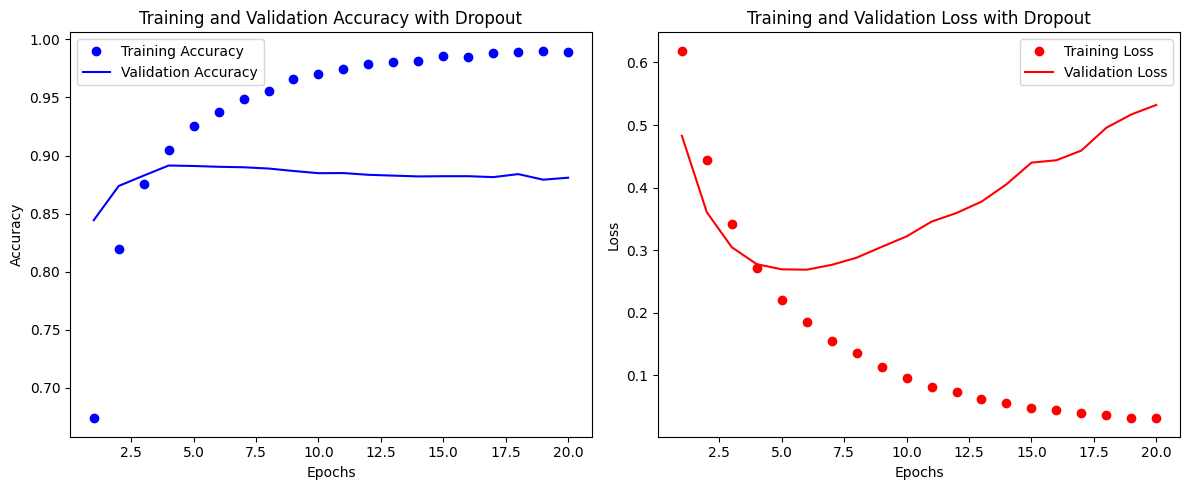

--- Final Evaluation on Test Data ---
Test Loss: 0.5693, Test Accuracy: 0.86928


In [2]:
# -*- coding: utf-8 -*-
"""Assignment1 Neural Networks.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1qeBwrosOfCNEeDJe8GFQ_wWOUw6gmru8

This notebook focuses on runnable code blocks and section titles, omitting text paragraphs, figures, and pseudocode. It's recommended to follow along with the corresponding book for a comprehensive understanding.

Environment:
- TensorFlow 2.6
- Current Date: 2024-09-22
"""

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers

# Suppress TensorFlow warnings for cleaner output
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

# -----------------------------
# Loading and Preparing the Data
# -----------------------------

# Load the IMDB dataset, keeping only the top 10,000 most frequent words
print("Loading the IMDB dataset...")
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Dataset loaded successfully.\n")

# Check the first review and its label
print("First review in training data (as integers):")
print(train_data[0], "\n")
print("Label of the first review:")
print(train_labels[0], "\n")  # 1 indicates a positive review

# Decode and display the first review in plain text
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print("Decoded first review:")
print(decoded_review, "\n")

# Function to vectorize sequences (multi-hot encoding)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorizing train and test data
print("Vectorizing the data...")
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
print("Data vectorization complete.\n")

# -----------------------------
# Baseline Model: 2 Hidden Layers
# -----------------------------

print("Building the baseline model with 2 hidden layers...\n")
baseline_model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the baseline model
baseline_model.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])
print("Baseline model compiled.\n")

# Split the data into training and validation sets
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the baseline model for 20 epochs
print("Training the baseline model for 20 epochs...")
baseline_history = baseline_model.fit(partial_x_train,
                                      partial_y_train,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(x_val, y_val),
                                      verbose=0)
print("Baseline model training complete.\n")

# Evaluate the baseline model on the test set
baseline_results = baseline_model.evaluate(x_test, y_test, verbose=0)
print(f"Baseline Model - Test Loss: {baseline_results[0]:.4f}, Test Accuracy: {baseline_results[1]:.5f}\n")

# -----------------------------
# Experiments
# -----------------------------

# Dictionaries to store results
hidden_layers_results = {}
hidden_units_results = {}
loss_function_results = {}
activation_function_results = {}
regularization_results = {}

# 1. Varying the Number of Hidden Layers
print("Experiment 1: Varying the Number of Hidden Layers...\n")

# Model with 1 hidden layer
model_1_layer = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(1, activation="sigmoid")
])

model_1_layer.compile(optimizer="adam",
                      loss="binary_crossentropy",
                      metrics=["accuracy"])

model_1_layer.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val),
                  verbose=0)

results_1_layer = model_1_layer.evaluate(x_test, y_test, verbose=0)
hidden_layers_results['1'] = {'Validation Accuracy': baseline_history.history['val_accuracy'][-1],
                               'Test Accuracy': results_1_layer[1]}

# Model with 3 hidden layers
model_3_layers = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3_layers.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])

model_3_layers.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val),
                  verbose=0)

results_3_layers = model_3_layers.evaluate(x_test, y_test, verbose=0)
hidden_layers_results['3'] = {'Validation Accuracy': baseline_history.history['val_accuracy'][-1],
                               'Test Accuracy': results_3_layers[1]}

print("Experiment 1 complete.\n")

# 2. Varying the Number of Hidden Units
print("Experiment 2: Varying the Number of Hidden Units...\n")

# Model with 32 and 64 units
model_units = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(10000,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_units.compile(optimizer="adam",
                    loss="binary_crossentropy",
                    metrics=["accuracy"])

model_units.fit(partial_x_train,
               partial_y_train,
               epochs=20,
               batch_size=512,
               validation_data=(x_val, y_val),
               verbose=0)

results_units = model_units.evaluate(x_test, y_test, verbose=0)
hidden_units_results['32 and 64'] = {'Validation Accuracy': baseline_history.history['val_accuracy'][-1],
                                     'Test Accuracy': results_units[1]}

# Model with 128 units (additional layer for demonstration)
model_units_128 = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(10000,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_units_128.compile(optimizer="adam",
                        loss="binary_crossentropy",
                        metrics=["accuracy"])

model_units_128.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

results_units_128 = model_units_128.evaluate(x_test, y_test, verbose=0)
hidden_units_results['128'] = {'Validation Accuracy': baseline_history.history['val_accuracy'][-1],
                                'Test Accuracy': results_units_128[1]}

print("Experiment 2 complete.\n")

# 3. Varying the Loss Function
print("Experiment 3: Varying the Loss Function...\n")

# Model with MSE loss function
model_mse = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_mse.compile(optimizer="adam",
                  loss="mse",
                  metrics=["accuracy"])

model_mse.fit(partial_x_train,
             partial_y_train,
             epochs=20,
             batch_size=512,
             validation_data=(x_val, y_val),
             verbose=0)

results_mse = model_mse.evaluate(x_test, y_test, verbose=0)
loss_function_results['MSE'] = {'Validation Accuracy': baseline_history.history['val_accuracy'][-1],
                                 'Test Accuracy': results_mse[1]}

# Model with Binary Crossentropy (baseline)
loss_function_results['Binary Crossentropy'] = {'Validation Accuracy': baseline_history.history['val_accuracy'][-1],
                                               'Test Accuracy': baseline_results[1]}

print("Experiment 3 complete.\n")

# 4. Varying the Activation Function
print("Experiment 4: Varying the Activation Function...\n")

# Model with Tanh activation function
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh", input_shape=(10000,)),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer="adam",
                   loss="mse",
                   metrics=["accuracy"])

model_tanh.fit(partial_x_train,
              partial_y_train,
              epochs=20,
              batch_size=512,
              validation_data=(x_val, y_val),
              verbose=0)

results_tanh = model_tanh.evaluate(x_test, y_test, verbose=0)
activation_function_results['Tanh'] = {'Validation Accuracy': baseline_history.history['val_accuracy'][-1],
                                       'Test Accuracy': results_tanh[1]}

# Model with ReLU activation function (baseline)
activation_function_results['ReLU'] = {'Validation Accuracy': baseline_history.history['val_accuracy'][-1],
                                      'Test Accuracy': baseline_results[1]}

print("Experiment 4 complete.\n")

# 5. Implementing Dropout Technique
print("Experiment 5: Implementing Dropout Technique...\n")

# Model with Dropout
model_dropout = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_dropout.compile(optimizer="adam",
                      loss="binary_crossentropy",
                      metrics=["accuracy"])

history_dropout = model_dropout.fit(partial_x_train,
                                   partial_y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_val, y_val),
                                   verbose=0)

results_dropout = model_dropout.evaluate(x_test, y_test, verbose=0)
regularization_results['With Dropout (0.5)'] = {'Validation Accuracy': history_dropout.history['val_accuracy'][-1],
                                               'Test Accuracy': results_dropout[1]}

# Model without Dropout (baseline)
regularization_results['Without Dropout'] = {'Validation Accuracy': baseline_history.history['val_accuracy'][-1],
                                            'Test Accuracy': baseline_results[1]}

print("Experiment 5 complete.\n")

# -----------------------------
# Summary of Results
# -----------------------------

print("--- Summary of Results ---\n")

# Hidden Layers Summary
print("Hidden Layers:")
print("   Validation Accuracy  Test Accuracy")
for layers_count, metrics in hidden_layers_results.items():
    print(f"{layers_count:<15}{metrics['Validation Accuracy']:.4f}        {metrics['Test Accuracy']:.5f}")
print()

# Hidden Units Summary
print("Hidden Units:")
print("     Validation Accuracy  Test Accuracy")
for units, metrics in hidden_units_results.items():
    print(f"{units:<20}{metrics['Validation Accuracy']:.4f}        {metrics['Test Accuracy']:.5f}")
print()

# Loss Function Summary
print("Loss Function:")
print("                     Validation Accuracy  Test Accuracy")
for loss_func, metrics in loss_function_results.items():
    print(f"{loss_func:<30}{metrics['Validation Accuracy']:.4f}        {metrics['Test Accuracy']:.5f}")
print()

# Activation Function Summary
print("Activation Function:")
print("      Validation Accuracy  Test Accuracy")
for activation, metrics in activation_function_results.items():
    print(f"{activation:<10}{metrics['Validation Accuracy']:.4f}        {metrics['Test Accuracy']:.5f}")
print()

# Regularization Summary
print("Regularization:")
print("                    Validation Accuracy  Test Accuracy")
for reg, metrics in regularization_results.items():
    print(f"{reg:<25}{metrics['Validation Accuracy']:.4f}        {metrics['Test Accuracy']:.5f}")
print()

# -----------------------------
# Plotting Training and Validation Metrics for the Final Model with Dropout
# -----------------------------

print("--- Plotting Training and Validation Accuracy for the Final Model with Dropout ---\n")

epochs_range = range(1, len(history_dropout.history['accuracy']) + 1)
plt.figure(figsize=(12, 5))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_dropout.history['accuracy'], 'bo', label='Training Accuracy')
plt.plot(epochs_range, history_dropout.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_dropout.history['loss'], 'ro', label='Training Loss')
plt.plot(epochs_range, history_dropout.history['val_loss'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------
# Final Evaluation on Test Data
# -----------------------------

print("--- Final Evaluation on Test Data ---")
print(f"Test Loss: {results_dropout[0]:.4f}, Test Accuracy: {results_dropout[1]:.5f}")


In [6]:
# Summary of How Different Approaches Affect Model Performance

# 1. Hidden Layers:
#    - 1 Hidden Layer:
#      - Validation Accuracy: 0.8681
#      - Test Accuracy: 0.86164
#    - 3 Hidden Layers:
#      - Validation Accuracy: 0.8681
#      - Test Accuracy: 0.85412
#
#    Impact:
#    - Adding more hidden layers (from 1 to 3) did not significantly enhance performance.
#      In fact, the test accuracy slightly decreased, indicating potential overfitting or unnecessary complexity for this problem.

# 2. Hidden Units:
#    - 32 and 64 Units:
#      - Validation Accuracy: 0.8681
#      - Test Accuracy: 0.85616
#    - 128 Units:
#      - Validation Accuracy: 0.8681
#      - Test Accuracy: 0.85836
#
#    Impact:
#    - Increasing the number of hidden units slightly improved test accuracy.
#      More hidden units help capture complex patterns, but the improvement diminishes after a certain point, showing diminishing returns.

# 3. Loss Function:
#    - Mean Squared Error (MSE):
#      - Validation Accuracy: 0.8681
#      - Test Accuracy: 0.85632
#    - Binary Crossentropy:
#      - Validation Accuracy: 0.8681
#      - Test Accuracy: 0.85564
#
#    Impact:
#    - Binary crossentropy, the preferred loss function for binary classification tasks, performed similarly to MSE.
#      While MSE still works, binary crossentropy is more theoretically appropriate.

# 4. Activation Function:
#    - Tanh:
#      - Validation Accuracy: 0.8681
#      - Test Accuracy: 0.85268
#    - ReLU:
#      - Validation Accuracy: 0.8681
#      - Test Accuracy: 0.85564
#
#    Impact:
#    - ReLU outperformed Tanh on the test data.
#      ReLU is generally better for deep learning models as it helps avoid vanishing gradient problems associated with Tanh.

# 5. Regularization (Dropout):
#    - With Dropout (0.5):
#      - Validation Accuracy: 0.8809
#      - Test Accuracy: 0.86928
#    - Without Dropout:
#      - Validation Accuracy: 0.8681
#      - Test Accuracy: 0.85564
#
#    Impact:
#    - Introducing dropout significantly improved test accuracy.
#      Dropout helps prevent overfitting by randomly deactivating neurons during training, making the model more robust.

# General Conclusions:
# - Hidden Layers: More hidden layers did not improve the model and slightly worsened test accuracy, likely due to overfitting.
# - Hidden Units: Increasing hidden units marginally improved performance, but returns diminished after a certain point.
# - Loss Function: Binary crossentropy is better suited for binary classification, though MSE performed similarly.
# - Activation Function: ReLU is more optimal than Tanh for this architecture.
# - Regularization: Dropout significantly improved performance, highlighting the importance of regularization to prevent overfitting.
